In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set()

In [11]:
df = pd.read_csv('age-caprio.csv')

In [15]:
df = df.iloc[:,:1]

In [28]:
years = list(range(1999, 2023))
years.append(2022)
caprio_age = list(range(24, 48))
caprio_age.append(47)
upper_bound = [25]*df.shape[0]

In [29]:
df['years'] = years
df['caprio_age'] = caprio_age
df = df[['years', 'age', 'caprio_age']]
df.columns = ['years', 'date_age', 'caprio_age']

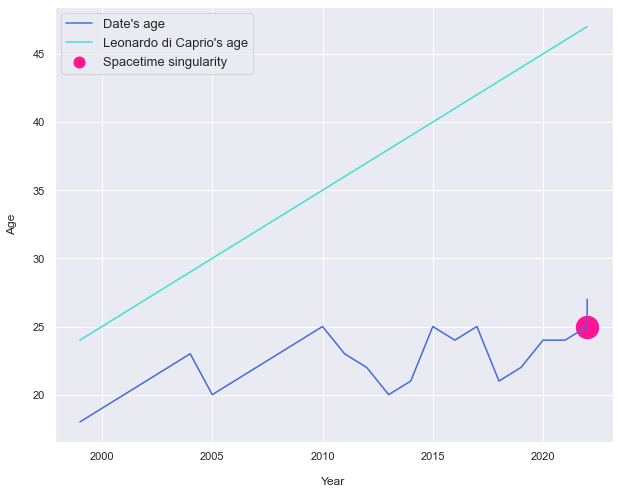

In [76]:
plt.figure(figsize = (10, 8))
plt.plot(df['years'], df['date_age'], c = 'royalblue')
plt.plot(df['years'], df['caprio_age'], c = 'turquoise')
plt.scatter(2022, 25, c = 'deeppink', s = 500)
plt.xlabel('\nYear')
plt.ylabel('Age\n')
lgnd = plt.legend(["Date's age", "Leonardo di Caprio's age", 'Spacetime singularity'], prop={'size': 13})
lgnd.legendHandles[2].set_sizes([120.0])
plt.show()

In [77]:
import statsmodels.api as sm

In [83]:
y = df['date_age']
x = df['caprio_age']

x_with_const = sm.add_constant(x)
res = sm.OLS(y, x_with_const).fit(cov_type = 'HC3')

In [84]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               date_age   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.441
Method:                 Least Squares   F-statistic:                     20.02
Date:                Fri, 16 Sep 2022   Prob (F-statistic):           0.000172
Time:                        16:45:40   Log-Likelihood:                -46.872
No. Observations:                  25   AIC:                             97.74
Df Residuals:                      23   BIC:                             100.2
Df Model:                           1                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.0495      1.628      9.246      0.000      11.859      18.240
caprio_age     0.2055      0.046      4.475      0.000       0.115       0.296
==============================================================================
Omnibus:                        1.338   Durbin-Watson:                   1.143
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                0.973
Skew:                          -0.179   Prob(JB):                        0.615
Kurtosis:                       2.102   Cond. No.                         188.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

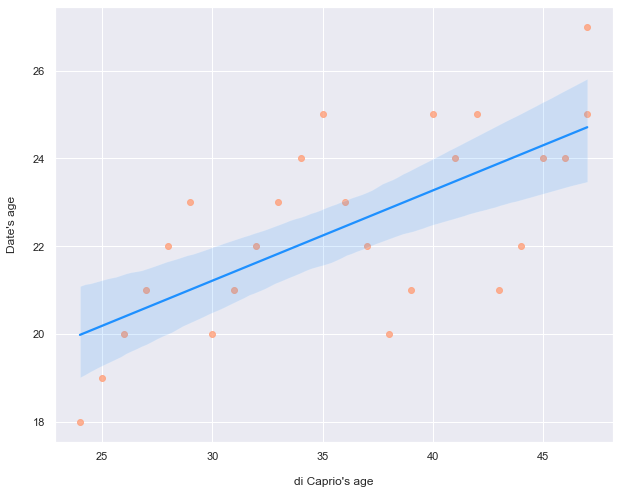

In [88]:
plt.figure(figsize = (10, 8))
sns.regplot(x = x, y = y, scatter_kws={"color": "lightsalmon"}, line_kws={"color": "dodgerblue"})
plt.xlabel('\ndi Caprio\'s age')
plt.ylabel('Date\'s age\n')
plt.show()